<a href="https://colab.research.google.com/github/louth/actions-on-google-kotlin/blob/master/03_BikeRental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROBLEM STATEMENT**


---
- Data Reference: 
    - This Hadi Fanaee-T
    - Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto INESC Porto, Campus da FEUP Rua Dr. Roberto Frias, 378 4200 - 465 Porto, Portugal

- Data Description: 
    - instant: record index
    - dteday : date
    - season : season (1:springer, 2:summer, 3:fall, 4:winter)
    - yr : year (0: 2011, 1:2012)
    - mnth : month ( 1 to 12)
    - hr : hour (0 to 23)
    - holiday : wether day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
    - weekday : day of the week
    - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
    + weathersit : 
        - 1: Clear, Few clouds, Partly cloudy
        - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
        - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
        - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
    - hum: Normalized humidity. The values are divided to 100 (max)
    - windspeed: Normalized wind speed. The values are divided to 67 (max)
    - casual: count of casual users
    - registered: count of registered users
    - cnt: count of total rental bikes including both casual and registered


---








#**0. IMPORT LIBRARIES**

In [59]:
import tensorflow as tf
print(tf.__name__, tf.__version__)
import pandas as pd 
print(pd.__name__, pd.__version__)
import numpy as np
print(np.__name__, np.__version__)
import seaborn as sns 
print(sns.__name__, sns.__version__)
import matplotlib
import matplotlib.pyplot as plt 
print(plt.__name__, matplotlib.__version__)
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
print(sklearn.__name__, sklearn.__version__)

tensorflow 2.4.1
pandas 1.1.5
numpy 1.19.5
seaborn 0.11.1
matplotlib.pyplot 3.2.2
sklearn 0.22.2.post1


In [30]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

#**1. IMPORT DATASETS**

In [31]:
from google.colab import drive
drive.mount('/content/drive')

bike = pd.read_csv('/content/drive/MyDrive/data/bike_sharing_daily.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(3), int64(11), object(1)
memory usage: 85.8+ KB


In [33]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#**2. CLEAN UP DATASET**

**2.1 Check for nulls** 

In [34]:
#sns.heatmap(bike.isnull())

**2.2 Remove/Reformat data**

In [35]:
bike = bike.drop(labels=['instant'], axis = 1)

In [36]:
bike = bike.drop(labels=['casual', 'registered'], axis = 1)

In [37]:
bike.dteday = pd.to_datetime(bike.dteday, format='%m/%d/%Y')

In [38]:
bike.index = pd.DatetimeIndex(bike.dteday)

In [39]:
bike = bike.drop(labels=['dteday'], axis = 1)

In [40]:
bike

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
dteday,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,2114
2012-12-28,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,3095
2012-12-29,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,1341


#**3. VISUALIZE DATASET**

Text(0, 0.5, 'Bike Rental')

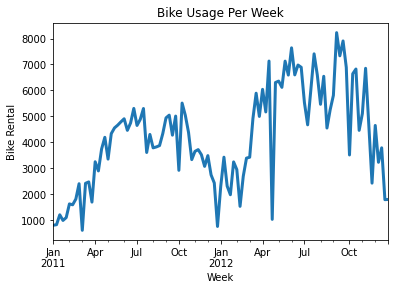

In [41]:
bike['cnt'].asfreq('W').plot(linewidth = 3)
plt.title('Bike Usage Per Week')
plt.xlabel('Week')
plt.ylabel('Bike Rental')

In [42]:
x_numerical = bike[['temp','hum','windspeed', 'cnt']]

In [43]:
x_numerical

,temp,hum,windspeed,cnt
dteday,,,,
2011-01-01,0.344167,0.805833,0.160446,985
2011-01-02,0.363478,0.696087,0.248539,801
2011-01-03,0.196364,0.437273,0.248309,1349
2011-01-04,0.200000,0.590435,0.160296,1562
2011-01-05,0.226957,0.436957,0.186900,1600
...,...,...,...,...
2012-12-27,0.254167,0.652917,0.350133,2114
2012-12-28,0.253333,0.590000,0.155471,3095
2012-12-29,0.253333,0.752917,0.124383,1341


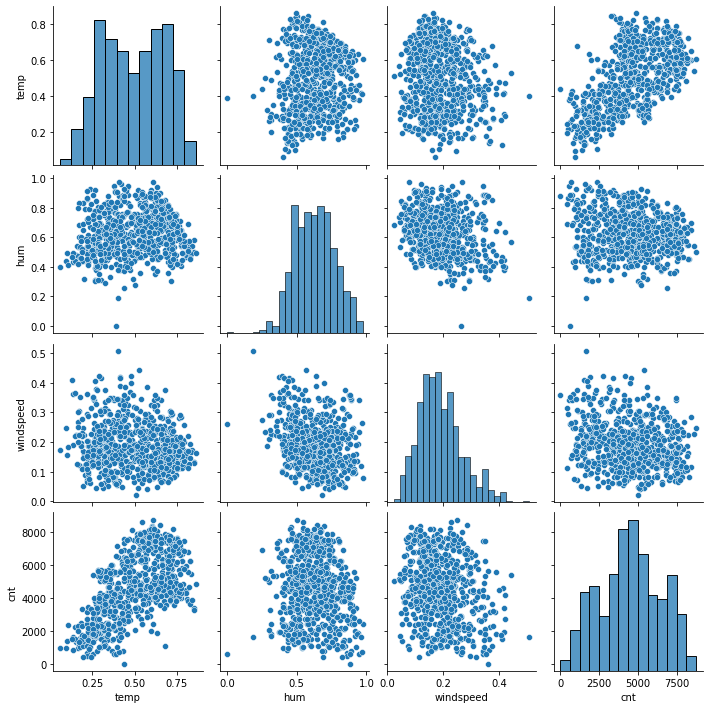

In [44]:
sns.pairplot(x_numerical)

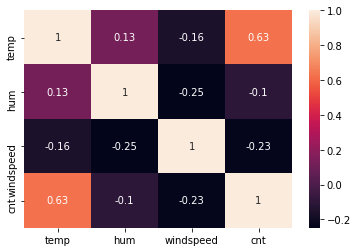

In [45]:
sns.heatmap(x_numerical.corr(), annot=True)

In [46]:
x_cat = bike[['season','yr','mnth','holiday','weekday','workingday','weathersit']]

In [47]:
encoder = OneHotEncoder()
x_cat = encoder.fit_transform(x_cat).toarray()
x_cat = pd.DataFrame(x_cat)
x_cat.shape


(731, 32)

In [48]:
x_numerical = x_numerical.reset_index()


In [49]:
x_numerical.shape

(731, 5)

In [50]:
x_all = pd.concat([x_cat, x_numerical], axis=1)
x_all.shape

(731, 37)

In [51]:
x_all = x_all.drop('dteday', axis = 1)

In [52]:
x_all.shape

(731, 36)

#**4. CREATE TRAINING AND TESTING DATASET**


In [54]:
x = x_all.iloc[:,:-1].values
y = x_all.iloc[:,-1:].values

In [56]:
scaler = MinMaxScaler()
y = scaler.fit_transform(y)

In [58]:
y

array([[0.11079153],
       [0.08962264],
       [0.15266912],
       [0.17717441],
       [0.18154625],
       [0.18223654],
       [0.1711919 ],
       [0.10780028],
       [0.09203866],
       [0.14944777],
       [0.14277497],
       [0.13115509],
       [0.15922688],
       [0.1609526 ],
       [0.14104924],
       [0.13598711],
       [0.11251726],
       [0.07604694],
       [0.18729867],
       [0.21916705],
       [0.1749885 ],
       [0.11033134],
       [0.11090658],
       [0.16037736],
       [0.22583985],
       [0.05568339],
       [0.04705476],
       [0.13173033],
       [0.12379199],
       [0.1235619 ],
       [0.17015647],
       [0.15393465],
       [0.17303267],
       [0.17579383],
       [0.19397147],
       [0.1130925 ],
       [0.18419236],
       [0.19443166],
       [0.17349287],
       [0.18212149],
       [0.17441325],
       [0.1983433 ],
       [0.16682006],
       [0.18028072],
       [0.21755637],
       [0.20628164],
       [0.24079613],
       [0.282

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

#**5. TRAIN THE MODEL**

#**6. EVALUATE THE MODEL** 